In [ ]:


import pandas as pd


file_path = '/content/amazon_reviews.csv'

try:
  # Load the dataset into a Pandas DataFrame
  df = pd.read_csv(file_path)

  # Print the column names
  print("Column Names:")
  print(df.columns)

  # Print the data types of each column
  print("\nData Types:")
  print(df.dtypes)

  # Print descriptive statistics
  print("\nDescriptive Statistics:")
  print(df.describe(include='all'))

  # Check for missing values
  print("\nMissing Values:")
  print(df.isnull().sum())

  # Check for duplicates
  print("\nDuplicate Rows:")
  print(df.duplicated().sum())

except FileNotFoundError:
  print(f"Error: File '{file_path}' not found.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file '{file_path}'. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Column Names:
Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

Data Types:
Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

Descriptive Statistics:
         Unnamed: 0     reviewerName      overall  reviewText  reviewTime  \
count   4915.000000             4914  4915.000000        4914        4915   
unique          NaN             4594          NaN        4912         690   
top             NaN  Amazon Customer          NaN  No issues.  2013-12-30   
freq  

data cleaning

In [ ]:
# prompt: give code for o	Impute numerical columns with mean or median.
# o	Drop rows with missing review text

# Impute numerical columns with the mean
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
  df[col].fillna(df[col].mean(), inplace=True)

# Check if 'review_text' or a similar column exists in the DataFrame
# Print the available columns for debugging
print(df.columns)

# Drop rows with missing review text, correcting the column name if needed
# Replace 'review_text' with the actual column name if it's different

if 'reviewText' in df.columns:
  df.dropna(subset=['reviewText'], inplace=True)
else:
  print("Column 'reviewText' not found. Please check the column names.")
  # Identify the correct column name and use it in dropna
  # You can use df.columns to list the available columns
  # and then replace 'review_text' with the correct name

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')


<ipython-input-6-a10187888261>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords

# Download the necessary NLTK data packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data package

file_path = '/content/amazon_reviews.csv'

try:
  # Load the dataset into a Pandas DataFrame
  df = pd.read_csv(file_path)

  # Print the column names
  print("Column Names:")
  print(df.columns)

  # Print the data types of each column
  print("\nData Types:")
  print(df.dtypes)

  # Print descriptive statistics
  print("\nDescriptive Statistics:")
  print(df.describe(include='all'))

  # Check for missing values
  print("\nMissing Values:")
  print(df.isnull().sum())

  # Check for duplicates
  print("\nDuplicate Rows:")
  print(df.duplicated().sum())

except FileNotFoundError:
  print(f"Error: File '{file_path}' not found.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file '{file_path}'. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

# data cleaning

# Impute numerical columns with the mean
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
  df[col].fillna(df[col].mean(), inplace=True)

# Check if 'review_text' or a similar column exists in the DataFrame
# Print the available columns for debugging
print(df.columns)

# Drop rows with missing review text, correcting the column name if needed
# Replace 'review_text' with the actual column name if it's different

if 'reviewText' in df.columns:
  df.dropna(subset=['reviewText'], inplace=True)
else:
  print("Column 'reviewText' not found. Please check the column names.")
  # Identify the correct column name and use it in dropna
  # You can use df.columns to list the available columns
  # and then replace 'review_text' with the correct name


#Text preprocessing
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in punctuation]) # Remove punctuation
    text = ''.join([char for char in text if not char.isdigit()]) #Remove numbers
    words = nltk.word_tokenize(text) # Tokenize the text into individual words
    words = [word for word in words if word not in stop_words] # Remove stop words
    return ' '.join(words)

if 'reviewText' in df.columns:
    df['cleaned_review'] = df['reviewText'].apply(clean_text)
else:
    print("Column 'reviewText' not found. Please check the column names.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-15-4998e2f3b2a0>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Column Names:
Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

Data Types:
Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

Descriptive Statistics:
         Unnamed: 0     reviewerName      overall  reviewText  reviewTime  \
count   4915.000000             4914  4915.000000        4914        4915   
unique          NaN             4594          NaN        4912         690   
top             NaN  Amazon Customer          NaN  No issues.  2013-12-30   
freq  

EDA(Exploratory Data Analysis )

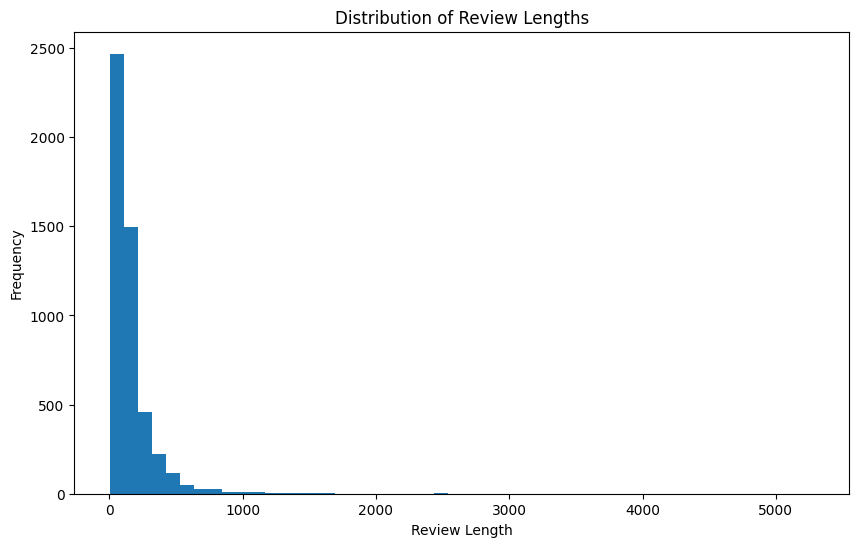

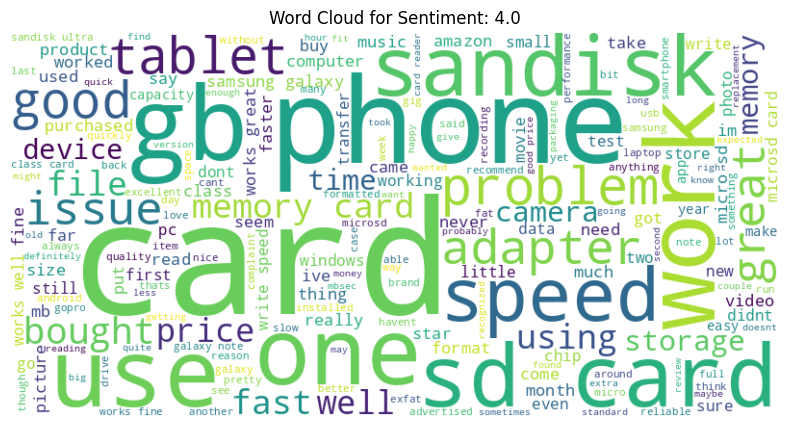

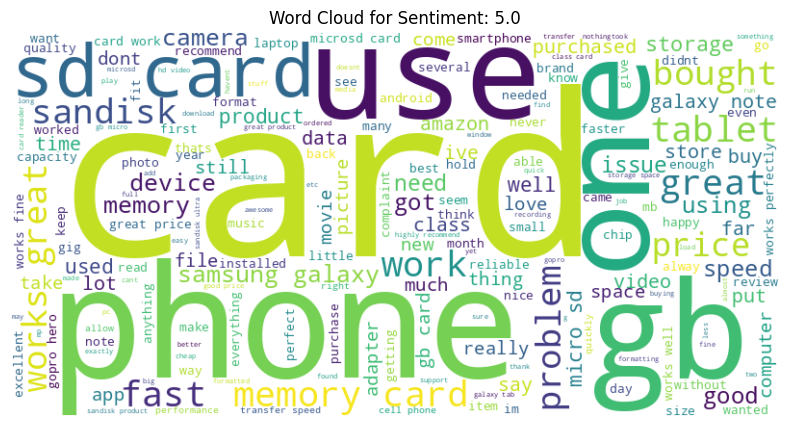

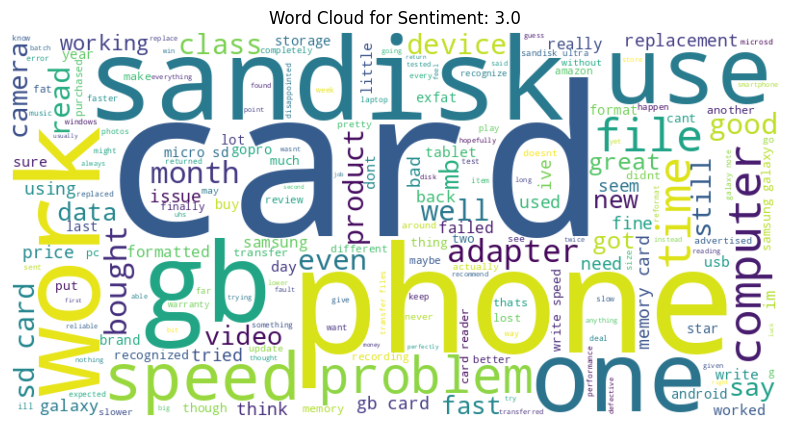

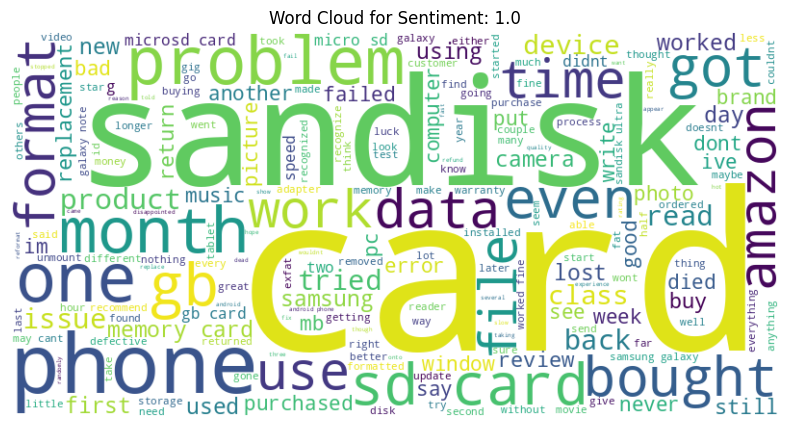

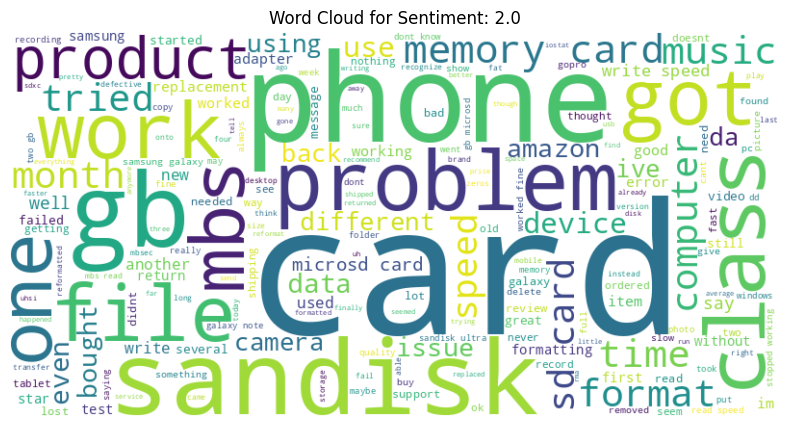

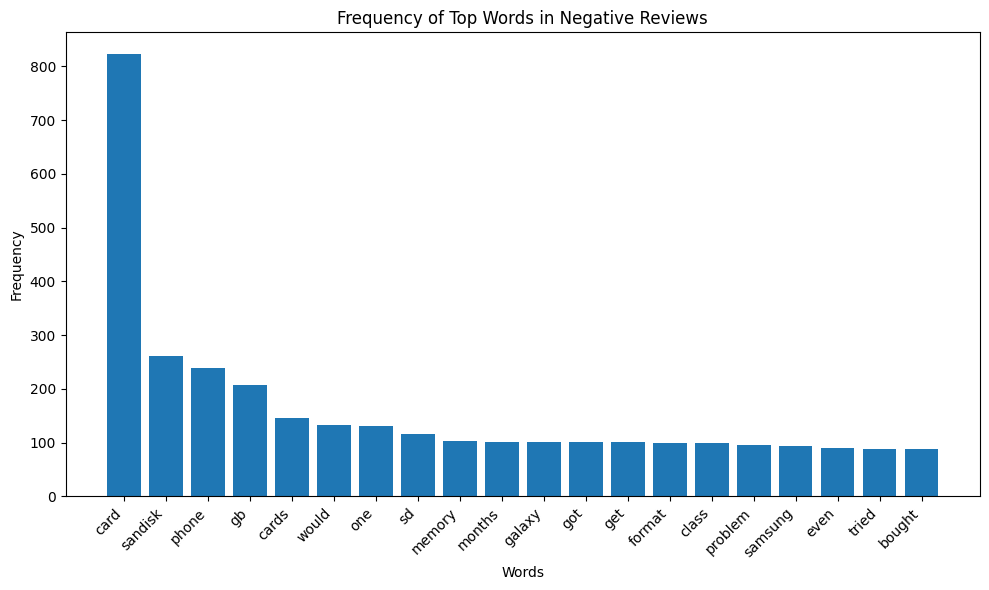

In [ ]:
# prompt: GIVE CODE FOR 1.	Plot the distribution of review lengths.
# 2.	Create a word cloud for each sentiment category.
# 3.	Visualize the frequency of top words in negative reviews

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# 1. Distribution of review lengths
if 'cleaned_review' in df.columns:
    df['review_length'] = df['cleaned_review'].apply(len)
    plt.figure(figsize=(10, 6))
    plt.hist(df['review_length'], bins=50)
    plt.xlabel('Review Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Review Lengths')
    plt.show()
else:
    print("Column 'cleaned_review' not found. Please ensure the text preprocessing step is completed.")


# 2. Word cloud for each sentiment category
# Assuming 'overall' column represents sentiment
if 'overall' in df.columns and 'cleaned_review' in df.columns:
    for sentiment in df['overall'].unique():
        text = ' '.join(df[df['overall'] == sentiment]['cleaned_review'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Sentiment: {sentiment}')
        plt.show()
else:
    print("Columns 'overall' or 'cleaned_review' not found. Please check column names.")


# 3. Frequency of top words in negative reviews
if 'overall' in df.columns and 'cleaned_review' in df.columns:
    negative_reviews = df[df['overall'] <= 2]['cleaned_review']  # Assuming overall <=2 is negative
    negative_words = ' '.join(negative_reviews).split()
    word_counts = Counter(negative_words)
    top_words = word_counts.most_common(20)  # Get the 20 most frequent words

    words, counts = zip(*top_words)  # Unzip the words and counts

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Frequency of Top Words in Negative Reviews')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print("Columns 'overall' or 'cleaned_review' not found. Please check column names.")

feature engineering

In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns # Make sure to import seaborn


# Download the necessary NLTK data packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data package

file_path = '/content/amazon_reviews CLEANED.csv'

try:
  # Load the dataset into a Pandas DataFrame
  df = pd.read_csv(file_path)

  # ... (Rest of your data loading, cleaning, and EDA code) ...

  # Feature Engineering

  if df is not None:  # This check is now redundant but can be left for clarity
      # 1. Review Length:
      if 'review_body' in df.columns:
          df['review_length'] = df['review_body'].apply(len)

      # 2. Helpfulness Ratio:
      if 'helpful_votes' in df.columns and 'total_votes' in df.columns:
          df['helpfulness_ratio'] = df.apply(lambda row: row['helpful_votes'] / row['total_votes'] if row['total_votes'] > 0 else 0, axis=1)

      # 3. Positive/Negative sentiment (example using a basic threshold - refine for better results)
      if 'star_rating' in df.columns:
          df['sentiment'] = df['star_rating'].apply(lambda rating: 'positive' if rating > 3 else ('negative' if rating < 3 else 'neutral'))


      # Display the updated DataFrame with new features
      print(df.head())

      # Explore the new features (example)
      if 'review_length' in df.columns:
          sns.histplot(df['review_length'], kde=True) # Using seaborn
          plt.title('Distribution of Review Length')
          plt.show()

      if 'helpfulness_ratio' in df.columns:
          sns.histplot(df['helpfulness_ratio'], kde=True) # Using seaborn
          plt.title('Distribution of Helpfulness Ratio')
          plt.show()

      if 'sentiment' in df.columns:
          print(df['sentiment'].value_counts()) # Display sentiment counts
          sns.countplot(x='sentiment', data=df) # Using seaborn
          plt.title('Sentiment Distribution')
          plt.show()

except FileNotFoundError:
  print(f"Error: File '{file_path}' not found.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file '{file_path}'. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

   Unnamed: 0  reviewerName  overall  \
0           0           NaN        4   
1           1          0mie        5   
2           2           1K3        4   
3           3           1m2        5   
4           4  2&amp;1/2Men        5   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  23-07-2014       138   
1  Purchased this for my device, it worked as adv...  25-10-2013       409   
2  it works as expected. I should have sprung for...  23-12-2012       715   
3  This think has worked out great.Had a diff. br...  21-11-2013       382   
4  Bought it with Retail Packaging, arrived legit...  13-07-2013       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Correlation and Feature Selection

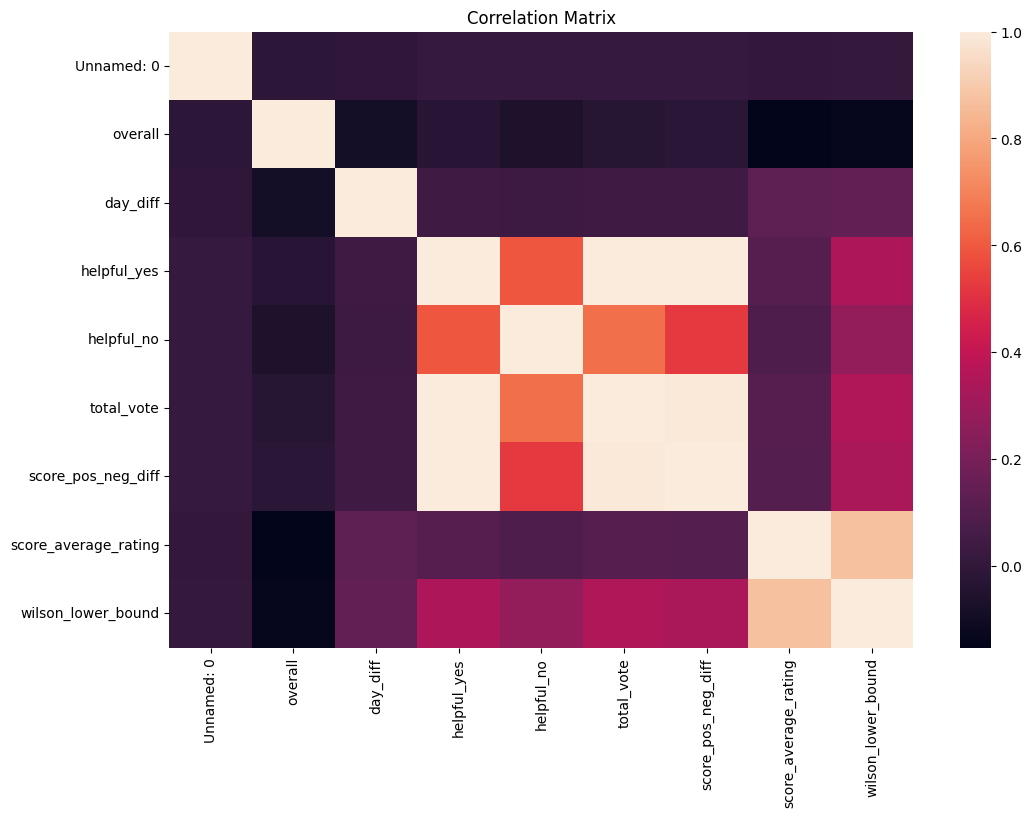

In [ ]:

# prompt: Correlation and Feature Selection FOR ABOVE DATASET

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code)

# Correlation and Feature Selection
if df is not None:
    # Calculate the correlation matrix, considering only numeric columns
    correlation_matrix = df.select_dtypes(include=['number']).corr()

# prompt: Correlation and Feature Selection FOR ABOVE DATASET

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code)

# Correlation and Feature Selection
if df is not None:
    # Calculate the correlation matrix, considering only numeric columns
    correlation_matrix = df.select_dtypes(include=['number']).corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix)
    plt.title('Correlation Matrix')
    plt.show()

In [ ]:
# prompt: give code for 	Linear Regression
# o	Random Forest
# o	Gradient Boosting (XGBoost)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'overall' is the target variable and you have other numerical features
# Replace 'feature1', 'feature2', etc. with your actual feature names
features = ['review_length', 'helpfulness_ratio']  # Example features, add more as needed
target = 'overall'

if target in df.columns and all(feature in df.columns for feature in features):
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 1. Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_mse = mean_squared_error(y_test, lr_predictions)
    lr_r2 = r2_score(y_test, lr_predictions)
    print(f"Linear Regression - MSE: {lr_mse}, R-squared: {lr_r2}")

    # 2. Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can tune n_estimators
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_predictions)
    rf_r2 = r2_score(y_test, rf_predictions)
    print(f"Random Forest - MSE: {rf_mse}, R-squared: {rf_r2}")

    # 3. Gradient Boosting (XGBoost)
    xgb_model = XGBRegressor(n_estimators=100, random_state=42) # Tune n_estimators and other parameters
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)
    xgb_mse = mean_squared_error(y_test, xgb_predictions)
    xgb_r2 = r2_score(y_test, xgb_predictions)
    print(f"XGBoost - MSE: {xgb_mse}, R-squared: {xgb_r2}")
else:
    print("Target or features not found in the DataFrame. Please check column names.")

Target or features not found in the DataFrame. Please check column names.
